In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.src.ops import array
from matplotlib.pyplot import colorbar
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sympy.physics.units import length
from tests.test_container import test_simple_search
%matplotlib inline

# Jouer avec les digits

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

**Question** Afficher et lire la description de ces données (attribut `DESCR`)

In [3]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(mnist["data"])

pandas.core.frame.DataFrame

**Question** Appeler `X` et `y` les données et la cible. Découper en `X_train`, `y_train`, `X_test`, `y_test` selon les indications données dans la description.

In [3]:
from sklearn.model_selection import train_test_split

X, y = mnist["data"].astype(int), mnist["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

On peut visualiser quelques digits par ce petit code

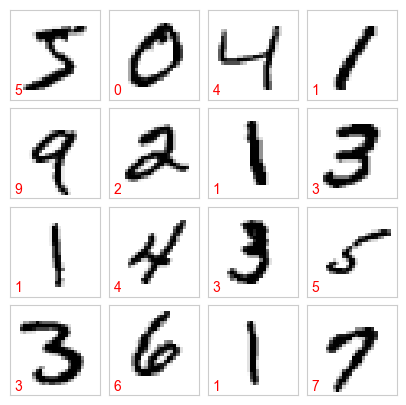

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i,ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28,28), cmap='binary')
    ax.text(0.05, 0.05, str(y.iloc[i]),
            transform=ax.transAxes, 
            color='red')

**Question** Créer 6 classifieurs de classe suivante. On prendra 5 voisins pour le $k$-plus proches voisins, et une profondeur de 20 pour les arbres de décision. Les mémoriser dans une liste `methods` pour plus de facilité.  

In [4]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(max_depth=20)
sgd = SGDClassifier()
logistic_regression = LogisticRegression()
svm = SVC()
gaussian_nb = GaussianNB()
randomforest = RandomForestClassifier()

methods = [knn, decision_tree, sgd, logistic_regression, svm, gaussian_nb, randomforest]
methods

[KNeighborsClassifier(),
 DecisionTreeClassifier(max_depth=20),
 SGDClassifier(),
 LogisticRegression(),
 SVC(),
 GaussianNB(),
 RandomForestClassifier()]

On considère les tailles de 100 à 4100 par pas de 1000. Par la suite on prendra des sous-échantillon de `X_train` tiré au hasard des tailles considérées (vous jouerez sur les indices plutôt que sur les données!!)

    sizes = list(range(100, 5000, 1000)) 

In [6]:
sizes = list(range(100, 5000, 1000))

subsamples = []

for size in sizes:
    indices = np.random.choice(range(len(X_train)), size=size, replace=False)
    X_subsample = X_train.iloc[indices]
    y_subsample = y_train.iloc[indices]
    subsamples.append((X_subsample, y_subsample))

len(subsamples)

5

# Mesurer les temps d'exécution

**Question** Regardez la documentation de %timeit

In [11]:
%timeit?

**Question** Que fait l'instruction ? 

    r = %timeit -o -q -r1 -n1 mon_appel_de_fonction
    
cette commande permet de mesurer le temps de l'execution de la commande mon_appel_de_fonction, de stocker le time result dans une variable (-o), sans afficher directement le resultat (-q), en faisant qu'une repetition (r1), et en faisant une boucle (n1). 

**Question** Remarquez ce que donne 
  
    <instance_de_methode_de_classif>.__class__.__name__
    
Cette commande donne le nom de la class.

In [7]:
methods_names = [method.__class__.__name__ for method in methods]
methods_names

['KNeighborsClassifier',
 'DecisionTreeClassifier',
 'SGDClassifier',
 'LogisticRegression',
 'SVC',
 'GaussianNB',
 'RandomForestClassifier']

**Question** En utilisant cela, faites le diagramme suivant :
- le temps d'exécution de l'entraînement du modèle
- le temps d'exécution de l'application du modèle
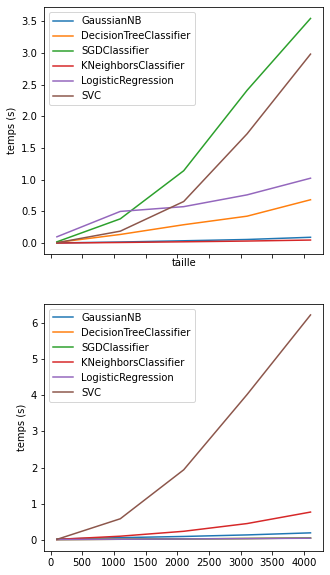

Dans chaque courbe, les modèles sont entraînés sur les mêmes données, qui sont des sous échantillons de `X_train` tirés au hasard de chaque taille de la liste `sizes`. 

C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

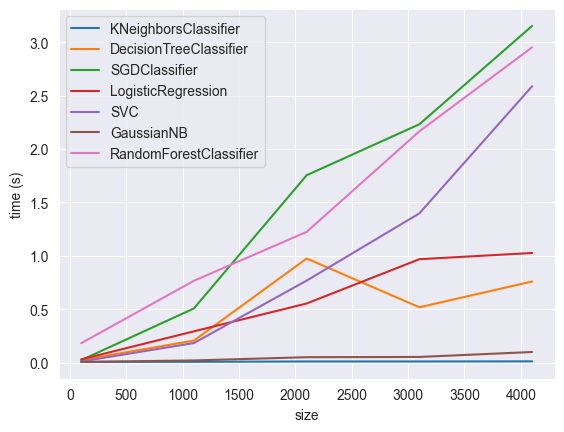

In [8]:
times_per_size = {name: [] for name in methods_names}
for subsample in subsamples:
    X_subsample, y_subsample = subsample
    
    for method, name in zip(methods, methods_names):
    
        r = %timeit -o -q -r1 -n1 method.fit(X_subsample, y_subsample)
        times_per_size[name].append(r.best)

for name, scores in times_per_size.items():
    plt.plot(sizes, scores, label=name)

plt.xlabel("taille")
plt.ylabel("temps (s)")
plt.legend()

C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

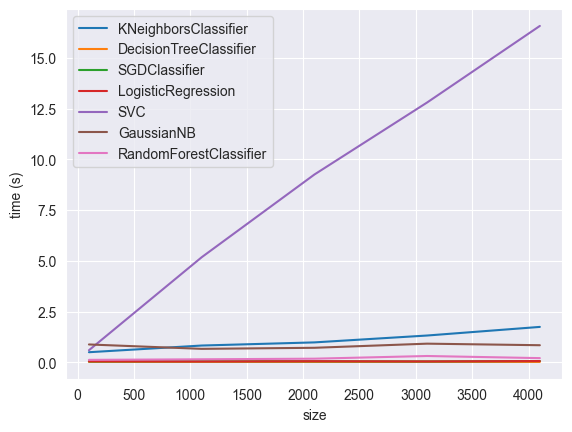

In [9]:
times_per_size = {name: [] for name in methods_names}
for subsample in subsamples:
    X_subsample, y_subsample = subsample
    
    for method, name in zip(methods, methods_names):
        
        method.fit(X_subsample, y_subsample)
        
        r = %timeit -o -q -r1 -n1 method.predict(X_test)
        times_per_size[name].append(r.best)

for name, scores in times_per_size.items():
    plt.plot(sizes, scores, label=name)

plt.xlabel("taille")
plt.ylabel("time (s)")
plt.legend()

**Question** Pourquoi a-t-on un message pour l'entraînement de certains modèles ? 

Il y a un probleme de convergence dans la regressionlogistic

**Question** Comment interprétez-vous les courbes obtenues ? 

On constate que tout les modeles ont une vitesse d'execution, sauf pour le modele SVG qui est plus lent.

# Mesurer les scores

**Question** Importer cross_val_score et lire la documentation

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score?

**Question** Tracer les courbes suivantes obtenues avec cross_val_score sur les différentes tailles. 
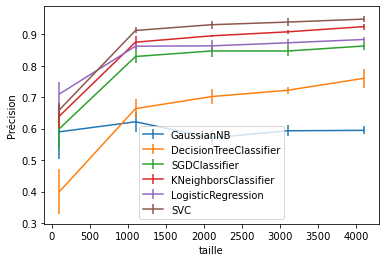

(et vous voulez, car c'est plus joli... :-) )

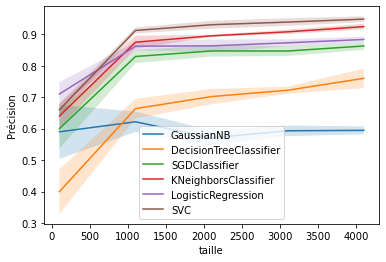

In [16]:
scores_per_size = {name: [] for name in methods_names}

for subsample in subsamples:
    X_subsample, y_subsample = subsample

    for method, name in zip(methods, methods_names):
        scores = cross_val_score(method, X_subsample, y_subsample, cv=5)
        scores_per_size[name].append(scores)


C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

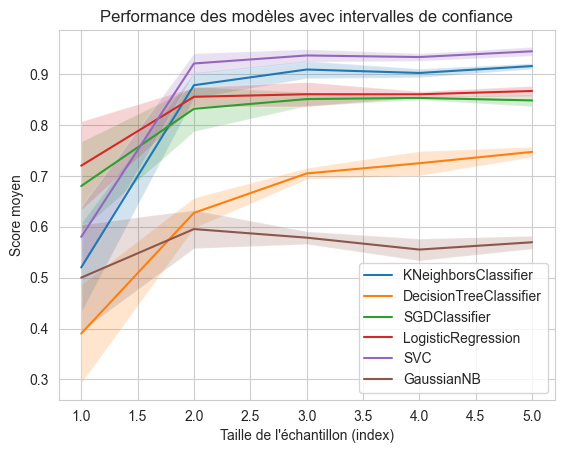

In [17]:
for model in methods_names :
    model_results = scores_per_size[model]
    means = [np.mean(scores) for scores in model_results]
    stds = [np.std(scores) for scores in model_results]
    
    sizes = range(1, len(means) + 1)
    
    plt.plot(sizes, means, label=model)
    
    plt.fill_between(sizes, 
                     np.array(means) - np.array(stds), 
                     np.array(means) + np.array(stds), alpha=0.2)

plt.title("Performance des modèles avec intervalles de confiance")
plt.xlabel("Taille de l'échantillon (index)")
plt.ylabel("Score moyen")
plt.legend()

# Matrice de confusion

On change de problème de classification en un problème binaire de détermination si un digit est le '3'.

In [18]:
y_binary = (y_train == 3).astype(int)

y_binary.shape, y_binary.unique()

((60000,), array([0, 1]))

**Question** Sélectionnez 5000 indices au hasard de X_train pour travailler sur un sous échantillon (nommé `Xs`, `ys`). Découpez ce sous-échantillon pour avoir un échantillon d'apprentissage et de validation. 

In [19]:
indices = np.random.choice(range(len(X_train)), size=5000, replace=False)
Xs = X_train.iloc[indices]
ys = y_binary.iloc[indices]
Xs.shape, ys.shape

((5000, 784), (5000,))

In [20]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=1/3, random_state=42) 

Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape

((3333, 784), (1667, 784), (3333,), (1667,))

**Question** Entraînez tous les classifieurs sur ce sous-échantillon et calculer dans un dictionnaire `pred` toutes les prédictions de chaque méthode sur l'échantillon de validation. 

In [21]:
pred = {name: int() for name in methods_names}

for method, name in zip(methods, methods_names):
    method.fit(Xs_train, ys_train)
    pred[name] = method.predict(Xs_test)
    
pred

C:\Users\val92\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNeighborsClassifier': array([0, 0, 0, ..., 0, 0, 0]),
 'DecisionTreeClassifier': array([0, 0, 0, ..., 0, 0, 0]),
 'SGDClassifier': array([0, 0, 1, ..., 0, 0, 1]),
 'LogisticRegression': array([0, 0, 0, ..., 0, 0, 1]),
 'SVC': array([0, 0, 0, ..., 0, 0, 0]),
 'GaussianNB': array([0, 0, 1, ..., 1, 1, 0])}

**Question** Calculer les matrices de confusion pour `lr` et `sgd`. Affichez aussi les matrices de confusion de façon graphique (`plot_confusion_matrix`)


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat_lr = confusion_matrix(ys_test, pred['LogisticRegression'])
conf_mat_sgd = confusion_matrix(ys_test, pred['SGDClassifier'])

conf_mat_lr.shape, conf_mat_sgd.shape

((2, 2), (2, 2))

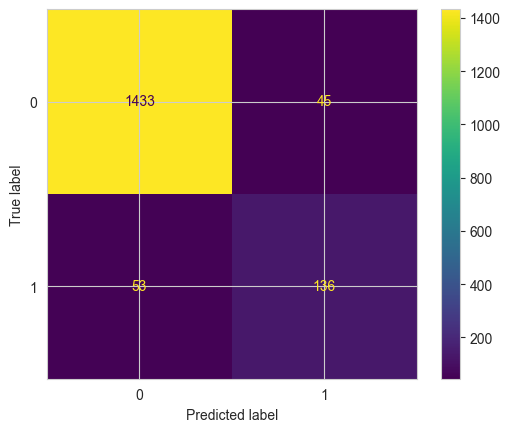

In [23]:
disp_lr = ConfusionMatrixDisplay(conf_mat_lr)
disp_lr.plot()

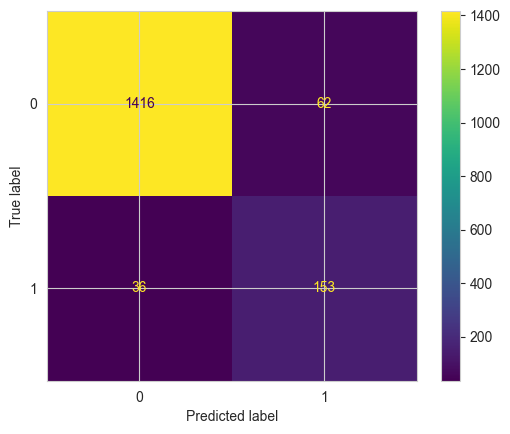

In [24]:
disp_lr = ConfusionMatrixDisplay(conf_mat_sgd)
disp_lr.plot()

**Question** En étudiant la matrice de confusion avec les prédictions dans `pred[lr]`, calculez 1 - le taux d'erreur (accuracy), la précision, le rappel (sans utiliser les fonctions de `sklearn`).

En interprétant le problème comme un problème multi-classe, calculez la précision en micro et macro average

In [25]:
vp = conf_mat_lr[1][1]
fp = conf_mat_lr[0][1]
fn = conf_mat_lr[1][0]
vn = conf_mat_lr[0][0]

vn, fp, fn, vp

(1433, 45, 53, 136)

In [26]:
total_samples = fn + fp + vn + vp

accuracy = (vn + vp) / total_samples
error_rate = 1 - accuracy

precision = vp/ (fp + vp)

precision_per_class = [vn / (vn + fn), vp / (vp + fp)]
recall = [vn / (vn + fp), vp / (vp + fn)]

tp_micro = vn + vp
micro_precision = tp_micro / total_samples

macro_precision = np.mean(precision_per_class)

macro_precision, micro_precision, recall, error_rate

(0.85785749871731,
 0.9412117576484703,
 [0.969553450608931, 0.7195767195767195],
 0.058788242351529685)

**Question**  Affichez les mêmes résultats maintenant avec les fonctions de `sklearn`. 

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preci_macro = precision_score(ys_test, pred['LogisticRegression'], average="macro")

preci_micro = precision_score(ys_test, pred['LogisticRegression'], average='micro')

recall_macro = recall_score(ys_test, pred['LogisticRegression'], average=None)

accuracy = accuracy_score(ys_test, pred['LogisticRegression'])

preci_macro, preci_micro, recall_macro, 1-accuracy

(0.85785749871731,
 0.9412117576484703,
 array([0.96955345, 0.71957672]),
 0.058788242351529685)

**Question** Utilisez `classification_report` pour afficher les résultats sur l'échantillon `valid` par les méthodes `lr` et `sgd`

In [35]:
from sklearn.metrics import classification_report

print(classification_report(ys_test, pred['LogisticRegression']))
print(classification_report(ys_test, pred['SGDClassifier']))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1478
           1       0.75      0.72      0.74       189

    accuracy                           0.94      1667
   macro avg       0.86      0.84      0.85      1667
weighted avg       0.94      0.94      0.94      1667

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1478
           1       0.71      0.81      0.76       189

    accuracy                           0.94      1667
   macro avg       0.84      0.88      0.86      1667
weighted avg       0.95      0.94      0.94      1667



'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97      1478\n           1       0.75      0.72      0.74       189\n\n    accuracy                           0.94      1667\n   macro avg       0.86      0.84      0.85      1667\nweighted avg       0.94      0.94      0.94      1667\n'

# Fonction de décision et courbe ROC

**Question** Affichez les 10 premiers scores calculés par `lr.decision_function` et les 10 premières étiquettes de l'échantillon de validation.

In [29]:
methods[3].decision_function(Xs_test.iloc[:10])

array([-117.78288537, -277.94150896,  -16.98695884, -148.06706485,
        -76.52594554, -235.78325493, -104.72229714,  -47.82703289,
       -120.38452129, -150.59686159])

In [30]:
ys_test.iloc[:10]

55900    0
57277    0
18326    0
63137    0
9947     0
39602    0
36041    0
37398    0
16547    0
23641    0
Name: class, dtype: int32

**Question** En utilisant `precision_recall_curve` sur les valeurs de la fonction de décision de `lr` faites le dessin suivant 

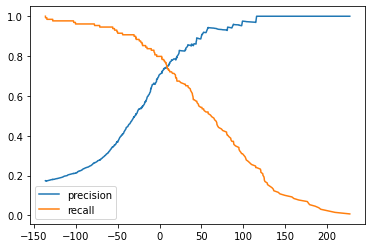


[0.11337732 0.11344538 0.11351351 ... 1.         1.         1.        ] [1.         1.         1.         ... 0.01058201 0.00529101 0.        ] [-399.04688351 -387.7141147  -371.45420549 ...  158.45136363  179.64778868
  200.50805178]


Text(0, 0.5, 'Precision')

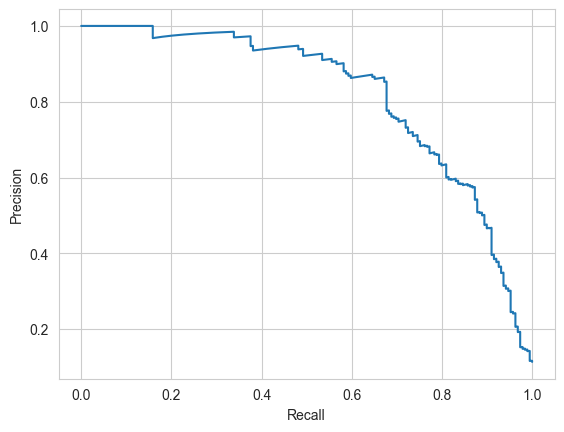

In [36]:
from sklearn.metrics import precision_recall_curve

decision_scores = methods[3].decision_function(Xs_test)

precision, recall, thresholds = precision_recall_curve(ys_test, decision_scores)
print(precision, recall, thresholds)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")


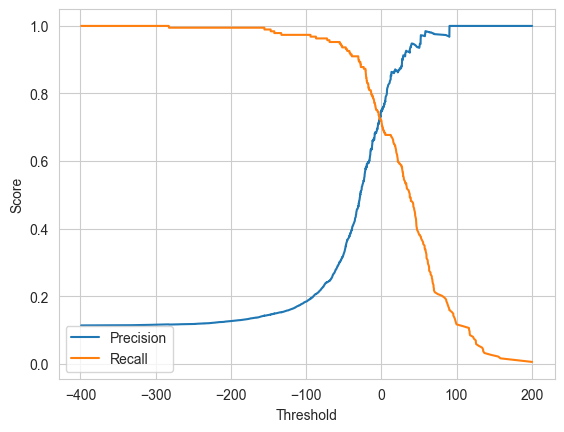

In [32]:
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()

**Question** Interprétez-le, en particulier les valeurs aux extrémités du graphe.

*Réponse*

On Constate que pour les seuils faibles on a une faible precision, pour les et un rappel fort. Plus le seuil est elevé, plus la precision augmente et plus le rappel diminue.

**Question** Utilisez maintenant `PrecisionRecallDisplay` pour tracer la courbe de précision contre rappel pour `lr`. Interprétez ce résultat.

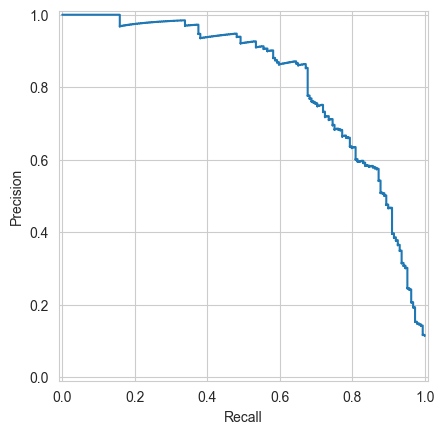

In [33]:
from sklearn.metrics import PrecisionRecallDisplay

plot = PrecisionRecallDisplay(precision=precision, recall=recall)

plot.plot()

*Réponse interprétation*

Cette courbe nous permet de constater que plus le modele est precis, moins le rappel est elevé. On cherche a avoir un modele avec la precision et le rappel le plus elevé possible. 

**Question** Utilisez `RocCurveDisplay.from_estimator` pour afficher la courbe ROC.

<module 'matplotlib.pyplot' from 'C:\\Users\\val92\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

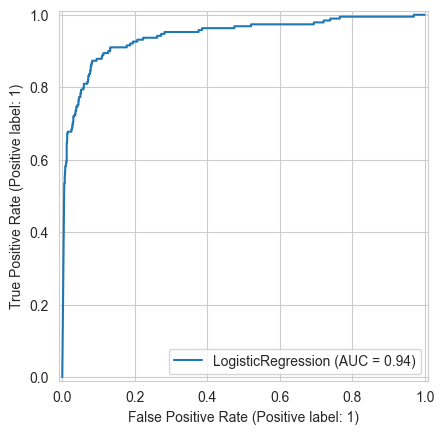

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(methods[3], Xs_test, ys_test)
plt